In [1]:
from tasks.model_TCN import FacialLandmarkDetector, lr_scheduler
from libs.dp import Dataset
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
model = FacialLandmarkDetector()

Model: "FacialLandmarkDetector_TCN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
tf.nn.relu (TFOpLambda)         (None, 128, 128, 64) 0           batch_normalization[0][0]        
_________________________________________________________________________

In [3]:
# checkpoint

checkpoint_path = "data/checkpoint_model_TCN/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')

model.save_weights(checkpoint_path.format(epoch=0))

In [4]:
IMG_RES = 256
HMS_RES = 64
NUM_LANDMARKS = 68
BATCH_SIZE = 16
DATASET_DIR = '../Data/300W_train/train.csv'

dataset = Dataset(IMG_RES, HMS_RES, NUM_LANDMARKS, DATASET_DIR)
dataset_generator = dataset.tf_dataset_from_generator(BATCH_SIZE)

Train dataset: ../Data/300W_train/train.csv
Train dataset is loaded. Shape: (3837, 2)


In [5]:
lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [6]:
hist = model.fit(dataset_generator.take(240), callbacks=[lr, cp_callback], epochs=120)

Epoch 1/120
240/240 [==============================] - 425s 2s/step - loss: 0.0257

Epoch 00001: saving model to data/checkpoint_model_TCN/cp-0001.ckpt
Epoch 2/120
240/240 [==============================] - 393s 2s/step - loss: 0.0034

Epoch 00002: saving model to data/checkpoint_model_TCN/cp-0002.ckpt
Epoch 3/120
240/240 [==============================] - 395s 2s/step - loss: 0.0029

Epoch 00003: saving model to data/checkpoint_model_TCN/cp-0003.ckpt
Epoch 4/120
240/240 [==============================] - 392s 2s/step - loss: 0.0027

Epoch 00004: saving model to data/checkpoint_model_TCN/cp-0004.ckpt
Epoch 5/120
240/240 [==============================] - 393s 2s/step - loss: 0.0023

Epoch 00005: saving model to data/checkpoint_model_TCN/cp-0005.ckpt
Epoch 6/120
240/240 [==============================] - 391s 2s/step - loss: 0.0018

Epoch 00006: saving model to data/checkpoint_model_TCN/cp-0006.ckpt
Epoch 7/120
240/240 [==============================] - 391s 2s/step - loss: 0.0015

Epoc

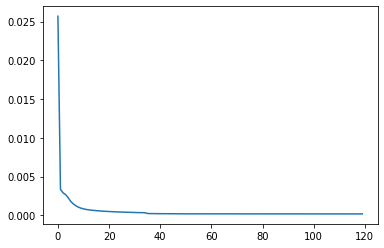

In [8]:
# plt.ylim([0.00005, 0.002])
plt.plot(range(120), hist.history['loss'])
# plt.plot(range(50), )

In [13]:
plt.savefig('history')

<Figure size 432x288 with 0 Axes>